# Прожито

Возьмите дамп «прожито»:

https://www.dropbox.com/sh/8vfjjt8107sv9r3/AADOVR795M..

Выберите из него небольшой когерентный кусочек при помощи тулзы для работы с дампом (https://github.com/kilomeow/prozhito-tools)

Особенно интересно выбрать кусок максимально удаленный от сегодня или с по какой-то причине непохожим на сегодняшний интернет языком

Расскажите коротко, почему вы выбрали такой кусок

Разметьте его каким-то готовым NER решением

Предложите подход к оценке и анализу полученной разметки. Чего вы ждёте от неё, какие машина допустила ошибки, как их может показаться можным исправить. Почему современный NER допускает такие ошибки? Что вы вообще думаете об этом и смежном?

Если вдруг успеете, сделайте часть такого анализа.

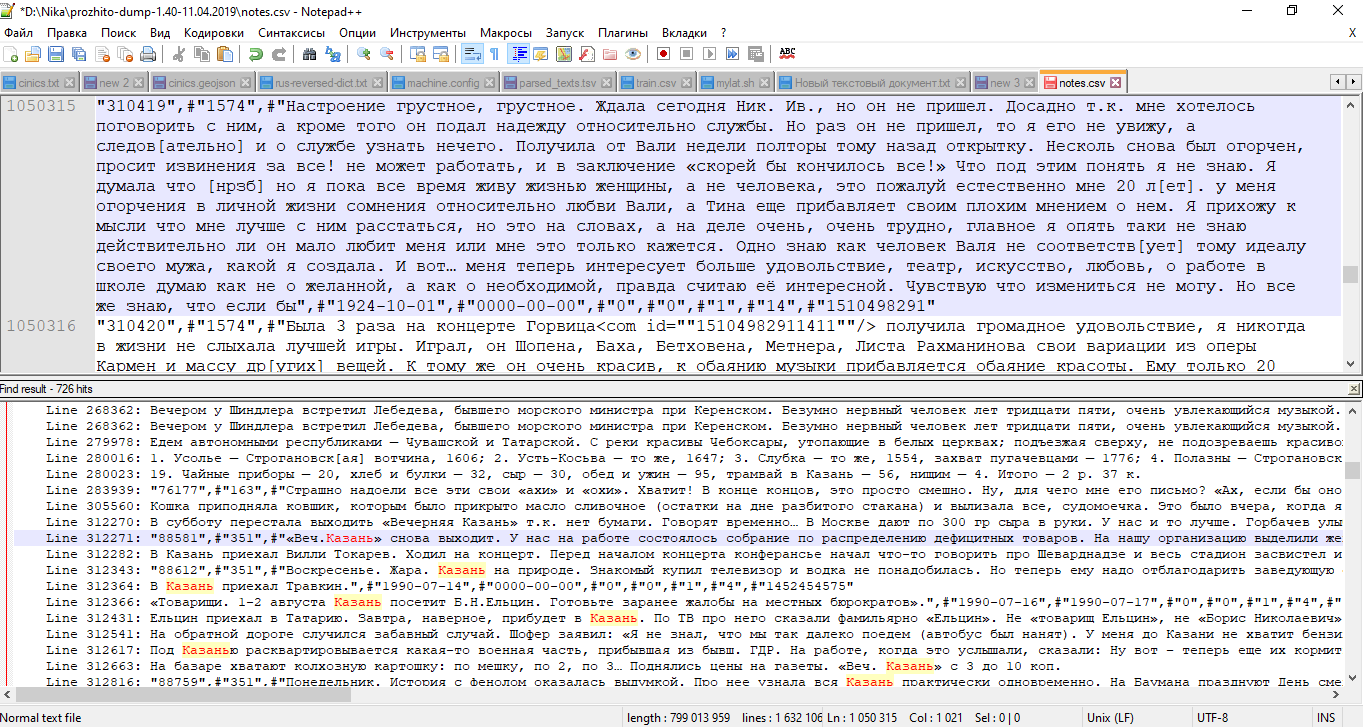

In [13]:
from dump import dump
dw = dump.Wrapper(csvpath='D:/Nika/prozhito-dump-1.40-11.04.2019')

In [14]:
dw.notes

[ #463400 "Воскресенье. Вчера приехал..." @2950 [0-0-0] ,
  #465445 "Ночью мы достигли..." @2268 [0-0-0] ,
  #430743 "Суббота. Москва. Еду..." @795 [0-12-21] ,
  ... ,
  #31036 "a..." @82 [2959-3-9] ]

In [35]:
august_notes = dw.notes[(2018, 1, 1) : (2020, 1, 1)]
august_notes

[ #395795 "Проходят поколения людей…..." @2378 [2018-1-1] ,
  #395796 "00:05 Вчера я..." @2378 [2018-1-5] ,
  #395797 "9:30 Как-то незаметно..." @2378 [2018-1-5] ,
  ... ,
  #395789 "Вся моя жизнь..." @2378 [2018-6-17] ]

In [36]:
len(august_notes)

40

In [38]:
for i in august_notes:
    print(i.text)

Проходят поколения людей… Да каких людей! Далеких и самых близких, молодых и старых, выдающихся и простых… Дух захватывает от 50-летнего шествия этих поколений. Проходят годы, десятилетия, и ты был свидетелем этого грандиозного шествия людей, которых мы знали, любили и любим…    
Тайна человеческого бытия, — рождение и смерть. Это же целая поэма, рассказ, повесть, роман…    
P.S. А некоторые это и не замечают и не волнуются этим.    
Господи! Помилуй нас, грешных.
 00:05    
Вчера я разговаривал с моими друзьями по академии имени Ленина. Они — хорошие ребята (Толя, Миша, Дима), но какие мы разные, — прошло 40 лет после нашего выпуска (1977г.) За это время мы прошли разные пути. В светской жизни они добились, может быть, большего (Дима стал профессором), но в духовном мы шли разными дорогами… И сейчас я начинаю понимать, сколько Господь дал мне, и сколько надо отдавать!    
Мне грешному иногда кажется, что путь, по которому вел меня Господь, это путь некоего избранничества, путь духовно

## Отрывок

Поскольку у разных теггеров очень разные системы тегов, мы сведём их к максимально общим категориям. Например, выделим А как категорию наречий и прилагательных. Почему не отдельно? Вещи типа "лучше" один теггер считает компаративами, второй прилагательными, третий наречиями. Таким образом, наши классы состоят из A, V, S и ещё нескольких более-иенее универсальных классов. К идеалу привести, конечно же, не получится, так как некоторые категории могут пересекаться непредсказуемо, и чтобы исключить это пересечение, необходимо было бы объединить слишком много.

In [1]:
TEXT = '''Власти Москвы выделили 110 млрд рублей на поддержку населения, системы здравоохранения и городского хозяйства. Об этом сообщается на сайте мэра столицы https://www.sobyanin.ru/ в пятницу, 1 мая. По адресу Алтуфьевское шоссе д.51 (основной вид разрешенного использования: производственная деятельность, склады) размещен МПЗ? Подпоручик Киже управляя автомобилем ВАЗ2107 перевозил автомат АК47 с целью ограбления банка ВТБ24, как следует из записей. 
Взыскать c индивидуального предпринимателя Иванова Костантипа Петровича дата рождения 10 января 1970 года, проживающего по адресу город Санкт-Петербург, ул. Крузенштерна, дом 5/1А 8 000 (восемь тысяч) рублей 00 копеек гос. пошлины в пользу бюджета РФ Жители требуют незамедлительной остановки МПЗ и его вывода из района. Решение было принято по поручению мэра города Сергея Собянина в связи с ограничениями из-за коронавируса'''

In [28]:
text_hard = '''Найяснейшего и непобедимого Великого Короля Сигизмунда Ш, Божиею милостию Короля Польского, В. К. Литовского,
Русского, Прусского, Мазовецкого, Жмудского, Лифляндского, Киевского, Волынского, Подольского, Подляшского, Короля Шведского,
Готского, Вандальского и иных многих славных Государств и Королевств найясняшего Маестату Его Королевского Величества, 
от Андрея Ивановича Сапеги, воеводы Мстиславского, старосты Оршанского, державца Орапского, в Смоленск, воеводе Смоленскому,
Михаилу Борисовичу Шеину. Извещаю тебя, воевода Смоленский, что Его Королевское Величество, Государь наш милостивый, 
по милости Божией, прибыл 4 Сентября в Оршу в добром здоровье. Еще прежде сего, от 25 Августа, я писал к тебе, 
воевода Смоленский, о великой милост]и найяснейшого Маестату Его Королевского Величества, Государя нашего милостивого 
так что ты сам, воевода Смоленский, выразумел из того письма столь великую милость и любовь, 
оказанную вам от Государя нашего милостивого но ты, воевода Смоленский, ничего не отвечал на то писание, и посланных моих 
отправил ко мне с ничем. Ныне дошло до меня известие, что некоторые своевольные люди Короля, Государя нашего, живущие на 
границе, учинили некоторые обиды в земле и повете Смоленском; и если действительно причинена людьми Оршанского повета 
такая обида людям Смоленского ведомства, то ты, воевода Смоленский, извести меня обо всем, а я, узнав это из твоего письма, 
тогож часу донесу найяснейшему Маестату Его Королевского Величества и за кем бы из людей Короля, Государя нашего милостивого,
таковые худые поступки оказались, тотчас же будет взыскано с него должное удовлетворение обиженным людям Смоленского повета.
Обо всем этом извести меня в скорости под присягою, а посланных моих, не задерживая, отправь ко мне тотчас же. Писано в Орше, 
лета от Рождества Сына Божия 1609, месяца Сентября, 6 дня. 
Божиею милостью Великого Государя, Царя и Великого Князя, Василия Ивановича, всей Руси Самодержца, Владимирского, 
Московского, Новгородского, Царя Казанского, Царя Астраханского, Царя Сибирского, Государя Псковского и Великого Князя 
Смоленского, Болгарского и иных, Государя и Великого Князя Новагорода Низовской земли, Черниговского, Рязанского, 
Ростовского, Ярославского, Белозерского, Удорского, Обдорского, Кондийского и всей Северной страны Повелителя, 
Государя Северской земли, Карталинских и Грузинских Царей и Кабардинской земли, Черкасских и Горских Князей и иных 
многих государств Государя и Обладателя, Его Царского Величества от старшины и воеводы и наместника Смоленского, 
Михаила Борисовича Шеина, в Оршу, Оршанскому старосте Андрею Ивановичу Сапеге. Августа 22 дня писал ты ко мне в листе 
своем с посланными своими, с Павликом Полежоным, что Государь ваш, Король Сигизмунд, приехал в Оршу и чтобы мне уведомить 
тебя о своевольных людях Государя вашего, учинивших обиды везде на границе Смоленской. И я неоднократно прежде сего писал 
к тебе, когда у Великого Государя нашего Царя и Великого Князя, Василия Ивановича, всей Русии Самодержца, в Москве, 
были послы вашего Короля, Николай Олесницкий и Александр Гонсевский и гонцы Станислав Витовский и Князь Ян Соколинский, 
и постановили между Великим Государем вашим, Королем Сигизмундом, и между их великими Государствами союз и мир, утвердив 
его союзными грамотами и крестным целованием на том*,* чтобы в перемирное время разрыва и войны никому не начинать, а 
которые люди Государя вашего в государстве нашего Государя, с панами и ротмистрами и со множеством Польских и Литовских 
людей, опустошают вместе с Самозванцем земли Государя нашего и проливают Христианскую кровь, и всех бы тех людей, по 
общему согласию, из государств Великого Государя нашего вашему Государю, Королю Сигизмунду, вывести, и впредь, в перемирные 
годы, не пропускать никого военным обычаем из Государств вашего Государя, и обманщиков, которые изменнически называют себя 
потомками Великих Государей, не держать и никакого вспомоществования им не оказывать. И после того посольского постановления
и утверждения, Польские и Литовские люди и доныне проливают Христианскую кровь в Государств нашего Государя и опустошают 
земли Государя нашего. И ты, Андрей Иванович, Государю своему, Королю Сигизмунду и паном Раде поговори о том, чтобы Государь
ваш, Король Сигизмунд, по посольскому договору, не приказал нарушать перемирного постановления с Государем нашим и не 
начинал войны в перемирное время; а которые Государя вашего Королевские люди проливают Христианскую кровь в земле Государя 
нашего, и тех бы людей Король, по посольскому постановлению, приказал вывесть из земли нашего Государя и не велел бы в 
перемирные годы пропускать ни одного военного человека в земли нашего Государя, чтобы не проливать Христианской крови 
вопреки крестному целованию и не нарушить доброго дела между Государем и между Государствами. А что ты прежде сего писал в 
своем листе о прибытии Короля, что Государь ваш, Король, идет для доброго дела и для того, чтобы унять пролитие Христианской 
крови, и этот Королевский поход в земли нашего Государя противен посольскому договору и крестному целованию, и от того 
произойдет еще большее смущение между Государями и Государствами, и от прибытия Короля кровь Христианская не уймется; а 
унять Христианскую кровь вашему Государю тем, чтобы, по посольскому постановлению, наказать Польских и Литовских людей, 
которые вместе с обманщиком проливают Христианскую кровь н опустошают земли нашего Государя, и вывести их из земли нашего 
Государя, — и тем Христианская кровь уймется. А посланных твоих я отправил к тебе, не задерживая. Писано в Великого 
Государя нашего, Его Царского Величества, отчине, в городе Смоленске, 1609 года, Августа 22 дня.'''

Этот текст неплох для того, чтобы проверять теггеры по нему, так как здесь не каждое место сложное, но их достаточно. К примеру, разметка прилагательных, причастий и субстантивированных существительных. "Директорская" и "приёмная" выглядят одинаково, однако второе хотелось бы видеть размеченным как сууществительное, а первое -- как нечто прилагательноподобное. К тому же, здесь достаточно сокращений (завучиха, трудовик), омонимии (запах), наречий с дефисом внутри (де-юре), новообразованных слов (псевдоавторитет), аббревиатур (Минобр), кратких прилагательных (недобр). 


Проблему в ручной разметке составляют те же самые вводные, а также частицы. Было бы сложно в каких-то случаях точно определить принадлежность слова к части речи. К примеру, как бы мы хотели, чтобы программы анализировали слова типа "чин по чину"? Хотелось бы сказать, конечно, что это наречие, но вряд ли наши морфологизаторы это поймут. То же самое касается вещей типа "куда там" -- определить части речи в этом устоявшемся выражнении сложно. Поскольку, в отличие от авторов преддущего ридинга, не имела возможноти посоветоваться с командой эксперотов, то и разметила всё по разумению своему. Надеюсь, здесь не будет оцениваться качество меня как морфоразметчика. Да простят меня проверяющие за длинные переменные с разбором.

### Natasha

In [4]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [5]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

doc = Doc(TEXT)

### PullEnti

In [229]:
from pullenti_wrapper.processor import (
    Processor,
    MONEY,
    URI,
    PHONE,
    DATE,
    KEYWORD,
    DEFINITION,
    DENOMINATION,
    MEASURE,
    BANK,
    GEO,
    ADDRESS,
    ORGANIZATION,
    PERSON,
    MAIL,
    TRANSPORT,
    DECREE,
    INSTRUMENT,
    TITLEPAGE,
    BOOKLINK,
    BUSINESS,
    NAMEDENTITY,
    WEAPON,
)

processor = Processor([PERSON, ORGANIZATION, GEO, DATE, MONEY])
text = russian_text
result = processor(text)
result.graph

['Отсутствующих', 'людей', 'в', 'классе', 'отмечать', 'было', 'не', 'принято']


### Stanza

In [12]:
import stanza
stanza.download('ru')
def stanza_nlp_ru(text):
  nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
  doc = nlp(text)
  print(*[f'entity: {ent.text}\ttype: {ent.type}' for sent in doc.sentences for ent in sent.ents], sep='\n')
stanza_nlp_ru(russian_text)

### Polyglot

In [91]:
!polyglot download embeddings2.ru ner2.ru
from polyglot.text import Text
for ent in Text(russian_text).entities:
 print(ent[0],ent.tag)


-- Sentence 0 --
The	DET
big	ADJ
set	NOUN
up	ADP
was	AUX
set	VERB
to	PART
happen	VERB
at	ADP
exactly	ADV
7	NUM
o’clock	NOUN
-	PUNCT
though	SCONJ
the	DET
clock	NOUN
in	ADP
question	NOUN
would	VERB
probably	ADV
be	AUX
broken	VERB
,	PUNCT

    	SPACE
as	SCONJ
would	VERB
be	AUX
all	DET
clocks	NOUN
in	ADP
this	DET
godforsaken	ADJ
magical	ADJ
town	NOUN
.	PUNCT

-- Sentence 1 --
The	DET
citizens	NOUN
were	AUX
,	PUNCT
of	ADP
course	NOUN
,	PUNCT
nonplussed	VERB
,	PUNCT
as	SCONJ
in	ADP
“	PUNCT
unperturbed	ADJ

    	SPACE
and	CCONJ
not	PART
ashamed	ADJ
of	ADP
it	PRON
”	PUNCT
,	PUNCT
but	CCONJ
you	PRON
as	SCONJ
an	DET
impostor	NOUN
were	AUX
very	ADV
,	PUNCT
very	ADV
cautious	ADJ
-	PUNCT
and	CCONJ
kinda	ADV
angry	ADJ
.	PUNCT

-- Sentence 2 --
Life	NOUN
here	ADV
had	AUX
its	DET
ups	NOUN
and	CCONJ

    	SPACE
downs	NOUN
,	PUNCT
certainly	ADV
,	PUNCT
but	CCONJ
the	DET
well	NOUN
in	ADP
your	DET
garden	NOUN
was	AUX
,	PUNCT
well	INTJ
...	PUNCT
not	PART
one	NUM
of	ADP
the	DET
ups	NOUN
,	PUNCT
for	ADP
sur

### DeepPavlov

In [109]:
from deeppavlov import configs, build_model
from deeppavlov import build_model, configs

ner_model = build_model(configs.ner.ner_rus_bert, download=True)
result = ner_model([english_text])
for i in range(len(result[0][0])):
     if result [1][0][i] != 'O':
        print(result[0][0][i], result[1][0][i])

2020-10-18 20:01:43,291 https://nlp.informatik.hu-berlin.de/resources/models/multi-pos/pos-multi-v0.1.pt not found in cache, downloading to C:\Users\M\AppData\Local\Temp\tmp35vs92ee


100%|████████████████████████████████████████████████████████████████| 314055714/314055714 [1:23:39<00:00, 62565.23B/s]

2020-10-18 21:25:23,390 copying C:\Users\M\AppData\Local\Temp\tmp35vs92ee to cache at C:\Users\M\.flair\models\pos-multi-v0.1.pt


2020-10-18 21:25:27,162 removing temp file C:\Users\M\AppData\Local\Temp\tmp35vs92ee
2020-10-18 21:25:27,298 loading file C:\Users\M\.flair\models\pos-multi-v0.1.pt


### NLTK

In [111]:
import nltk
from nltk.tokenize import word_tokenize

In [115]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [258]:
tokens = word_tokenize(TEXT2)

print(tokens[0:10])

['The', 'big', 'set', 'up', 'was', 'set', 'to', 'happen', 'at', 'exactly']


In [259]:
nltk_result = []
for word in nltk.pos_tag(tokens):
    new_word = {}
    new_word['слово'] = word[0]
    new_word['разбор'] = convert_eng_tags(word[1])
    if new_word['разбор'] != 'PUNCT':
        nltk_result.append(new_word)

In [261]:
len(nltk_result)

127

## Accuracy для английского

In [269]:
detect_acc(spacy_result, RESULT2)

(0.9133858267716536,
 [[{'слово': 'up', 'разбор': 'PREP'}, {'слово': 'up', 'разбор': 'N'}],
  [{'слово': 'of', 'разбор': 'PREP'}, {'слово': 'of', 'разбор': 'A'}],
  [{'слово': 'course', 'разбор': 'N'}, {'слово': 'course', 'разбор': 'A'}],
  [{'слово': 'as', 'разбор': 'CONJ'}, {'слово': 'as', 'разбор': 'PREP'}],
  [{'слово': 'its', 'разбор': 'DET'}, {'слово': 'its', 'разбор': 'PRON'}],
  [{'слово': 'your', 'разбор': 'DET'}, {'слово': 'your', 'разбор': 'PRON'}],
  [{'слово': 'like', 'разбор': 'CONJ'}, {'слово': 'like', 'разбор': 'PREP'}],
  [{'слово': 'whatever', 'разбор': 'DET'},
   {'слово': 'whatever', 'разбор': 'PRON'}],
  [{'слово': 'that', 'разбор': 'DET'}, {'слово': 'that', 'разбор': 'PRON'}],
  [{'слово': 'that', 'разбор': 'DET'}, {'слово': 'that', 'разбор': 'CONJ'}],
  [{'слово': 'rose', 'разбор': 'V'}, {'слово': 'rose', 'разбор': 'N'}]])

In [270]:
detect_acc(flair_result, RESULT2)

(0.9606299212598425,
 [[{'слово': 'well', 'разбор': 'A'}, {'слово': 'well', 'разбор': 'INTJ'}],
  [{'слово': 'not', 'разбор': 'A'}, {'слово': 'not', 'разбор': 'PART'}],
  [{'слово': 'than', 'разбор': 'PREP'}, {'слово': 'than', 'разбор': 'CONJ'}],
  [{'слово': 'that', 'разбор': 'PRON'}, {'слово': 'that', 'разбор': 'CONJ'}],
  [{'слово': 'right', 'разбор': 'INTJ'}, {'слово': 'right', 'разбор': 'A'}]])

In [266]:
detect_acc(nltk_result, RESULT2)

(0.8110236220472441,
 [[{'слово': 'up', 'разбор': 'PART'}, {'слово': 'up', 'разбор': 'N'}],
  [{'слово': 'to', 'разбор': 'PREP'}, {'слово': 'to', 'разбор': 'PART'}],
  [{'слово': "o'clock", 'разбор': 'A'}, {'слово': "o'clock", 'разбор': 'N'}],
  [{'слово': 'though', 'разбор': 'PREP'},
   {'слово': 'though', 'разбор': 'CONJ'}],
  [{'слово': 'as', 'разбор': 'PREP'}, {'слово': 'as', 'разбор': 'CONJ'}],
  [{'слово': 'of', 'разбор': 'PREP'}, {'слово': 'of', 'разбор': 'A'}],
  [{'слово': 'course', 'разбор': 'N'}, {'слово': 'course', 'разбор': 'A'}],
  [{'слово': 'nonplussed', 'разбор': 'A'},
   {'слово': 'nonplussed', 'разбор': 'V'}],
  [{'слово': 'as', 'разбор': 'PREP'}, {'слово': 'as', 'разбор': 'CONJ'}],
  [{'слово': 'not', 'разбор': 'A'}, {'слово': 'not', 'разбор': 'PART'}],
  [{'слово': 'ashamed', 'разбор': 'V'}, {'слово': 'ashamed', 'разбор': 'A'}],
  [{'слово': 'kinda', 'разбор': 'V'}, {'слово': 'kinda', 'разбор': 'A'}],
  [{'слово': 'well', 'разбор': 'A'}, {'слово': 'well', 'разбор':

## Итоги

Итак, у нас получилось что-то, что показывает, что те библиотеки, которые больше ориентируются на контекст, точнее, но и они не идеальны.